In [1]:
#importy
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# načitanie datasetu
column_names = ['ID','title','artist','top_genre','year','added','bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop','country']
df = pd.read_csv('top50contry.csv',names=column_names,header = 0,nrows=300)

In [3]:
# výpis prvých 10 prvkov z datasetu
df[:10]

,ID,title,artist,top_genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,country
0,1,Dance_Monkey,Tones_and_I,australian_pop,2019,1969-12-31,98,59,82,-6,15,51,209,69,9,100,world
1,2,ROXANNE,Arizona_Zervas,pop_rap,2019,1969-12-31,117,60,62,-6,46,46,164,5,15,99,world
2,3,Memories,Maroon_5,pop,2019,1969-12-31,91,32,76,-7,8,57,189,84,5,99,world
3,4,Circles,Post_Malone,dfw_rap,2019,1969-12-31,120,76,70,-3,9,55,215,19,4,99,world
4,5,All_I_Want_for_Christmas_Is_You,Mariah_Carey,dance_pop,1994,1969-12-31,150,63,34,-7,7,35,241,16,4,98,world
5,6,everything_i_wanted,Billie_Eilish,electropop,2019,1969-12-31,120,23,70,-14,11,24,245,90,10,98,world
6,7,Falling,Trevor_Daniel,alternative_r&b,2018,1969-12-31,127,43,78,-9,9,24,159,12,4,97,world
7,8,RITMO_(Bad_Boys_For_Life),The_Black_Eyed_Peas,dance_pop,2019,1969-12-31,105,72,72,-7,24,67,222,3,7,97,world
8,9,Don't_Start_Now,Dua_Lipa,dance_pop,2019,1969-12-31,124,79,79,-5,10,68,183,1,8,97,world
9,10,Tusa,KAROL_G,latin,2019,1969-12-31,101,72,80,-3,6,57,201,30,30,96,world


In [4]:
# Predátujem prvky datasetu na číslo
df['bpm'] = pd.to_numeric(df['bpm'])
df['nrgy'] = pd.to_numeric(df['nrgy'])
df['dnce'] = pd.to_numeric(df['dnce'])
df['dB'] = pd.to_numeric(df['dB'])
df['live'] = pd.to_numeric(df['live'])
df['val'] = pd.to_numeric(df['val'])
df['dur'] = pd.to_numeric(df['dur'])
df['acous'] = pd.to_numeric(df['acous'])

In [5]:
df.describe()

,ID,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,2005.210000,124.280000,60.536667,63.836667,-7.250000,18.593333,64.043333,208.500000,35.706667,8.036667,85.243333
std,86.746758,19.731625,31.072495,19.024241,17.034786,3.415609,16.156466,21.353564,59.550799,29.796421,7.588628,11.055838
min,1.000000,1942.000000,65.000000,11.000000,22.000000,-17.000000,4.000000,14.000000,117.000000,0.000000,3.000000,37.000000
25%,75.750000,1994.000000,98.000000,48.000000,53.000000,-9.000000,8.000000,47.000000,170.500000,10.750000,4.000000,83.000000
50%,150.500000,2018.000000,120.000000,65.000000,68.000000,-7.000000,11.000000,68.000000,204.000000,27.000000,5.000000,88.000000
75%,225.250000,2019.000000,147.000000,76.000000,76.000000,-5.000000,24.000000,82.000000,239.250000,61.000000,9.000000,92.000000
max,300.000000,2019.000000,202.000000,93.000000,93.000000,-1.000000,88.000000,98.000000,463.000000,96.000000,38.000000,100.000000


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


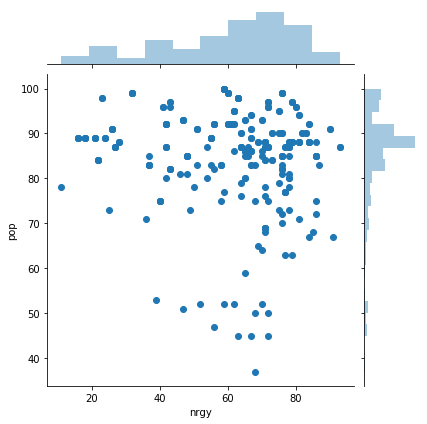

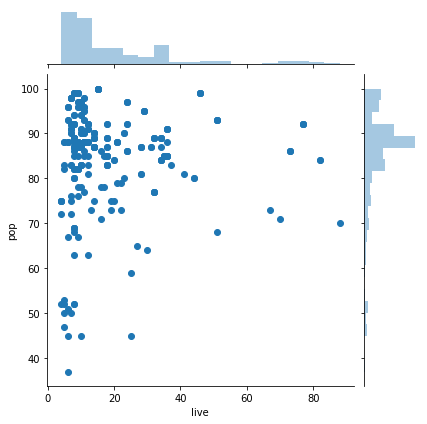

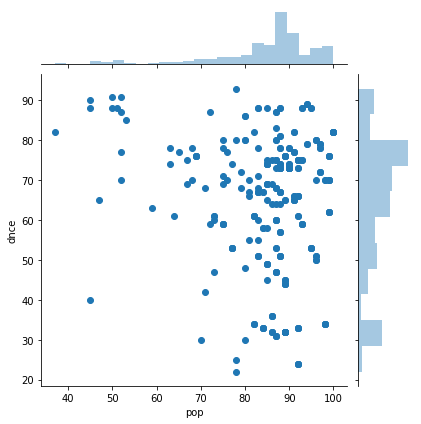

In [6]:
#Vzájomný vzťah medzi nrgy(Energia piesne) a pop(Popularitou)
sns.jointplot(df['nrgy'],df['pop'],data=df,kind='scatter')
#Vzájomný vzťah medzi live(Živosť piesni) a pop(Popularitou)
sns.jointplot(df['live'],df['pop'],data=df,kind='scatter')
#Vzájomný vzťah  pop(Popularitou) a medzi dnce(Schopnosť tancovať na danú pieseň)
sns.jointplot(df['pop'],df['dnce'],data=df,kind='scatter')

In [7]:
#Uloženie vsetkých žánrov do premennej zanre
zanre = df['top_genre']
from nltk.probability import FreqDist
frekvencia_bajky = FreqDist(zanre)
#Vypísanie najčastejších žánrov
frekvencia_bajky.most_common(9)

[('adult_standards', 71),
 ('latin', 46),
 ('dance_pop', 29),
 ('album_rock', 15),
 ('pop', 11),
 ('canadian_pop', 9),
 ('new_wave_pop', 9),
 ('afro_house', 8),
 ('australian_pop', 7)]

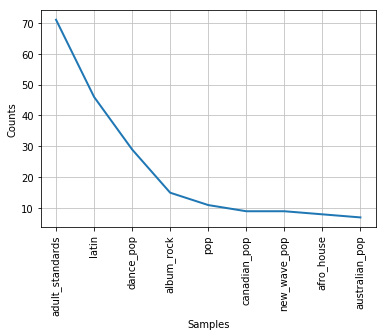

In [8]:
#Graf výskytu žánra v datasete
%matplotlib inline
frekvencia_bajky.plot(9, cumulative=False)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


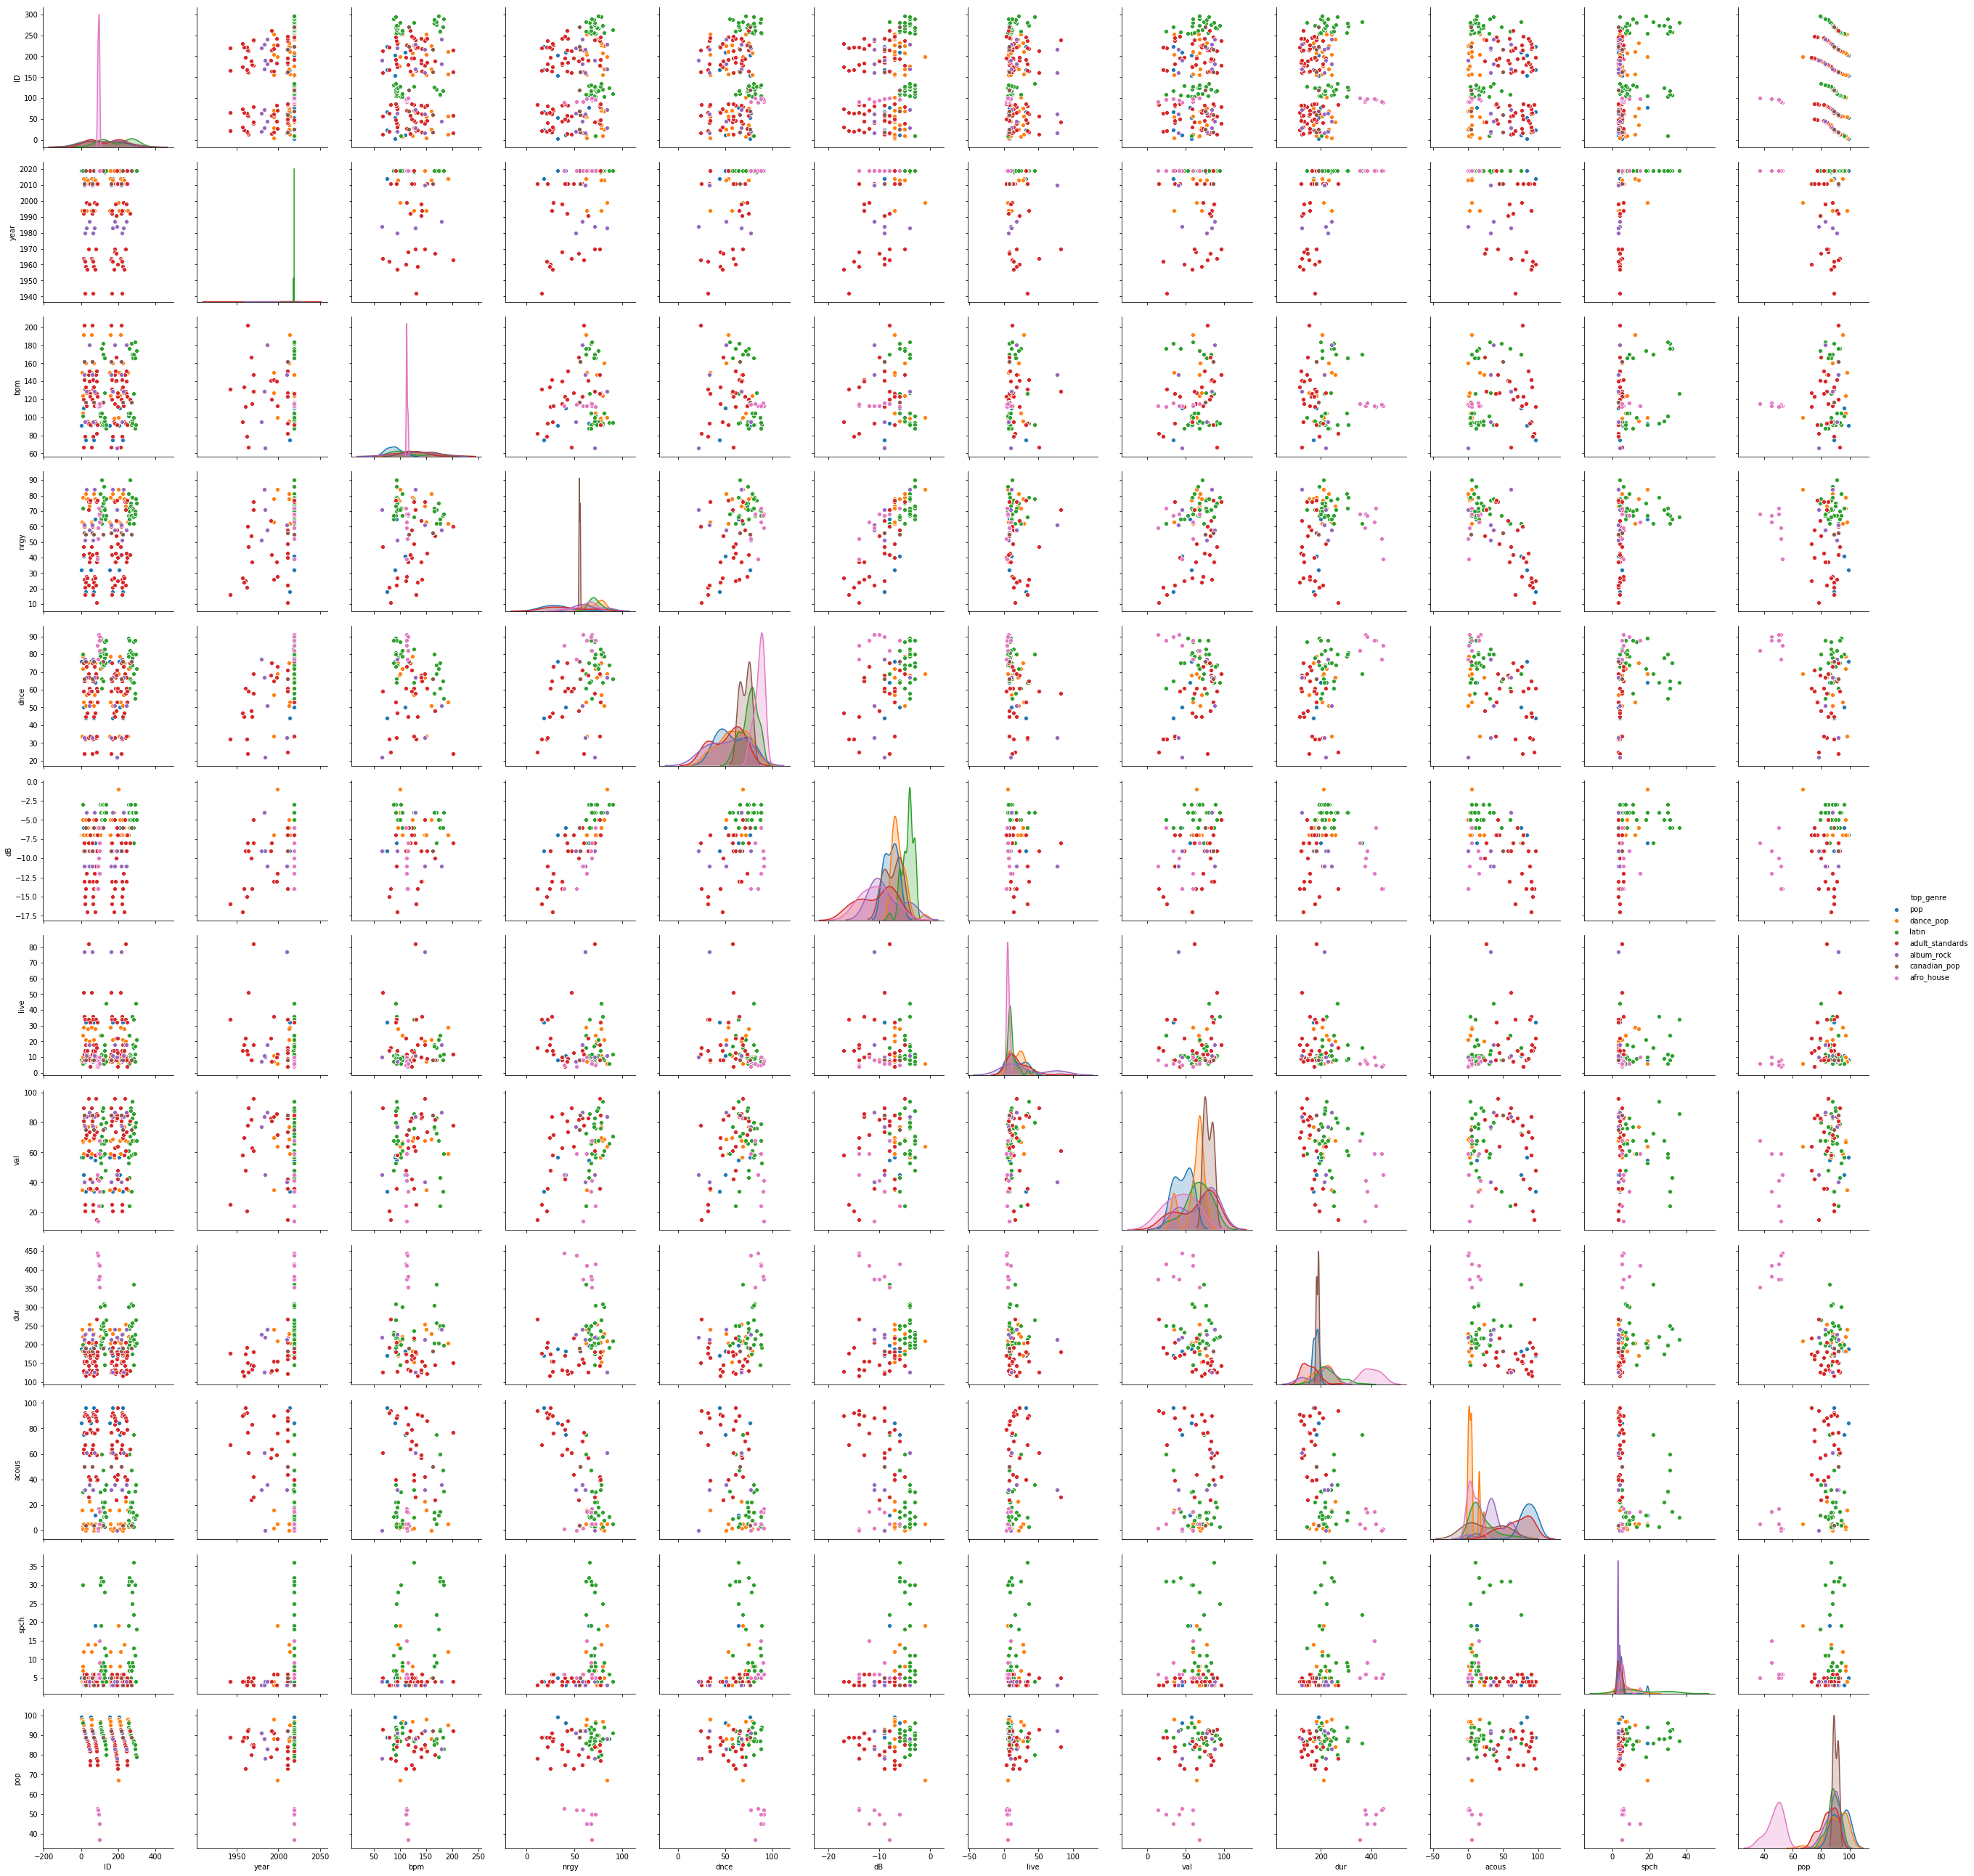

In [11]:
kategorie = ["adult_standards","latin",'dance_pop','album_rock','pop','canadian_pop','new wave_pop','afro_house','australian-pop']
new_df = df[df['top_genre'].isin(kategorie)]
sns.pairplot(new_df, hue="top_genre", height=3, diag_kind="kde")

In [12]:
from sklearn.model_selection import train_test_split
data = new_df
X = data[['acous', 'val', 'pop','spch']]
y = data['top_genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
pd.options.mode.chained_assignment = None

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["top_genre"] = labelencoder.fit_transform(data["top_genre"])
type = pd.DataFrame({'top_genre': ["adult_standards","latin",'dance_pop','album_rock','pop','canadian_pop','new_wave_pop','afro_house','australian_pop']})

In [16]:

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
    
    
data = create_dummies(data,"top_genre")

In [18]:
data.head()

,ID,title,artist,top_genre,year,added,bpm,nrgy,dnce,dB,...,spch,pop,country,top_genre_0,top_genre_1,top_genre_2,top_genre_3,top_genre_4,top_genre_5,top_genre_6
2,3,Memories,Maroon_5,6,2019,1969-12-31,91,32,76,-7,...,5,99,world,0,0,0,0,0,0,1
4,5,All_I_Want_for_Christmas_Is_You,Mariah_Carey,4,1994,1969-12-31,150,63,34,-7,...,4,98,world,0,0,0,0,1,0,0
7,8,RITMO_(Bad_Boys_For_Life),The_Black_Eyed_Peas,4,2019,1969-12-31,105,72,72,-7,...,7,97,world,0,0,0,0,1,0,0
8,9,Don't_Start_Now,Dua_Lipa,4,2019,1969-12-31,124,79,79,-5,...,8,97,world,0,0,0,0,1,0,0
9,10,Tusa,KAROL_G,5,2019,1969-12-31,101,72,80,-3,...,30,96,world,0,0,0,0,0,1,0


In [17]:
# import modelu MLP
from sklearn.neural_network import MLPClassifier
# Inicializovanie perceptrónu
mlp = MLPClassifier(hidden_layer_sizes =(100,),solver='adam',learning_rate_init= 0.01, max_iter=500)


In [19]:
# Natrénovať model
mlp.fit(X_train, y_train)

# Výstupy
MLPClassifier (activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9, 
beta_2=0.999, early_stopping=False, epsilon=1e-08,       
hidden_layer_sizes=10, learning_rate='constant',      
learning_rate_init=0.01, max_iter=500, momentum=0.9,       
nesterovs_momentum=True, power_t=0.5, random_state=None,       
shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,       
verbose=False, warm_start=False)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.01, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [20]:
print(mlp.score(X_test,y_test))

0.868421052631579


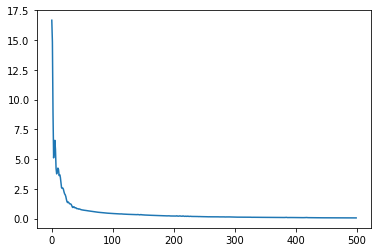

In [21]:
errors = mlp.loss_curve_ 

plt.plot(errors)
plt.show()